In [1]:
#Importing Libraries
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten


In [2]:
count = 0 
dirs = os.listdir('Images/')
for dir in dirs:
    files = list(os.listdir('Images/'+dir))
    print( dir +' Folder has '+ str(len(files)) + ' Images')
    count = count + len(files)
print( 'Images Folder has '+ str(count) + ' Images')

Alopecia Folder has 2516 Images
balness Folder has 534 Images
dandruff Folder has 319 Images
Images Folder has 3369 Images


In [3]:
base_dir = 'Images/'
img_size = 180
batch = 32

In [4]:
train_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'training',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

val_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'validation',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

Found 3367 files belonging to 3 classes.
Using 2694 files for training.
Found 3367 files belonging to 3 classes.
Using 673 files for validation.


In [5]:
hair_names = train_ds.class_names
hair_names

['Alopecia', 'balness', 'dandruff']

In [6]:
import matplotlib.pyplot as plt

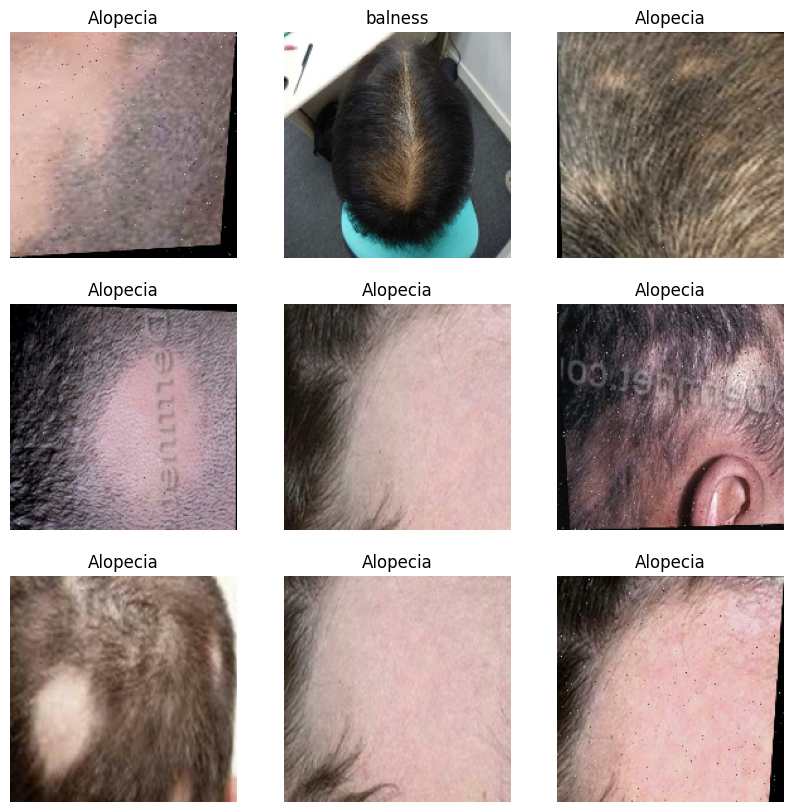

In [7]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(hair_names[labels[i]])
        plt.axis('off')

In [8]:
AUTOTUNE = tf.data.AUTOTUNE

In [9]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)
    

In [10]:
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [12]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal",input_shape = (img_size,img_size,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

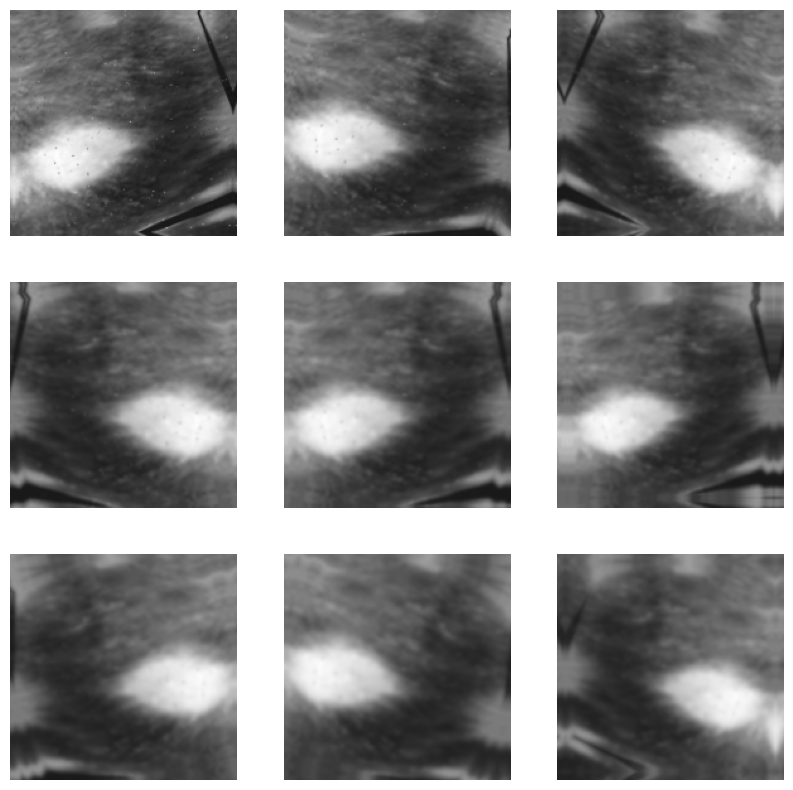

In [13]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3,3, i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')

In [14]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5)
])

In [16]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)            │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [18]:
history = model.fit(train_ds, epochs=15, validation_data=val_ds)

Epoch 1/15
85/85 ━━━━━━━━━━━━━━━━━━━━ 60s 663ms/step - accuracy: 0.8017 - loss: 0.6698 - val_accuracy: 0.8886 - val_loss: 0.2894
Epoch 2/15
85/85 ━━━━━━━━━━━━━━━━━━━━ 39s 450ms/step - accuracy: 0.9662 - loss: 0.0915 - val_accuracy: 0.9346 - val_loss: 0.1915
Epoch 3/15
85/85 ━━━━━━━━━━━━━━━━━━━━ 15s 172ms/step - accuracy: 0.9715 - loss: 0.0912 - val_accuracy: 0.9762 - val_loss: 0.0608
Epoch 4/15
85/85 ━━━━━━━━━━━━━━━━━━━━ 14s 165ms/step - accuracy: 0.9870 - loss: 0.0414 - val_accuracy: 0.9747 - val_loss: 0.0617
Epoch 5/15
85/85 ━━━━━━━━━━━━━━━━━━━━ 14s 169ms/step - accuracy: 0.9798 - loss: 0.0487 - val_accuracy: 0.9955 - val_loss: 0.0234
Epoch 6/15
85/85 ━━━━━━━━━━━━━━━━━━━━ 14s 165ms/step - accuracy: 0.9910 - loss: 0.0268 - val_accuracy: 0.9970 - val_loss: 0.0192
Epoch 7/15
85/85 ━━━━━━━━━━━━━━━━━━━━ 14s 166ms/step - accuracy: 0.9901 - loss: 0.0239 - val_accuracy: 0.9985 - val_loss: 0.0198
Epoch 8/15
85/85 ━━━━━━━━━━━━━━━━━━━━ 15s 174ms/step - accuracy: 0.9951 - loss: 0.0136 - val_accu

In [21]:
input_image = tf.keras.utils.load_img('sample/Dandruff.jpg',target_size=(180,180))
input_image_array = tf.keras.utils.img_to_array(input_image)
input_image_exp_dim = tf.expand_dims(input_image_array,0)
predictions = model.predict(input_image_exp_dim)
result = tf.nn.softmax(predictions[0])
hair_names[np.argmax(result)]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


'dandruff'

In [22]:
def classify_images(image_path):
    input_image = tf.keras.utils.load_img(image_path, target_size=(180,180))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array,0)

    predictions = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0])
    outcome = 'The Image belongs to ' + hair_names[np.argmax(result)] + ' with a score of '+ str(np.max(result)*100)
    return outcome

In [24]:
classify_images('sample/Dandruff.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


'The Image belongs to dandruff with a score of 99.72459077835083'

In [25]:
model.save('Hair_recog_model.keras')